In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# LOAD DATA

In [3]:
tran_data = pd.read_excel('QVI_transaction_data.xlsx')
purc_data = pd.read_csv('QVI_purchase_behaviour.csv')

# TRANSACTION DATA DESCRIPTION AND SUMMARY

In [4]:
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [6]:
tran_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000


# PRODUCT DESCRIPTION AND SUMMARY

In [7]:
tran_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Tyrrells Crisps     Lightly Salted 165g     3174
Infuzions BBQ Rib   

# PRODUCT QUANTITY AND SALES SUMMARY

In [8]:
prod_data = pd.DataFrame(tran_data.groupby('PROD_NAME')['PROD_QTY', 'TOT_SALES'].sum())
# item_data = pd.DataFrame(tran_data.groupby('PROD_NAME')['PROD_QTY', 'TOT_SALES'].count())
prod_data['PROD_QTY_%'] = (prod_data['PROD_QTY']/prod_data['PROD_QTY'].sum())*100
prod_data['TOT_SALES_%'] = (prod_data['TOT_SALES']/prod_data['TOT_SALES'].sum())*100
prod_data = prod_data.sort_values('TOT_SALES', ascending=False)
prod_data.reset_index(inplace=True)
prod_data = prod_data[['PROD_NAME', 'PROD_QTY', 'PROD_QTY_%', 'TOT_SALES', 'TOT_SALES_%']]
prod_data

C:\Users\Huleji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PROD_NAME,PROD_QTY,PROD_QTY_%,TOT_SALES,TOT_SALES_%
0,Dorito Corn Chp Supreme 380g,6509,1.288594,40352.0,2.086005
1,Smiths Crnkle Chip Orgnl Big Bag 380g,6164,1.220294,36367.6,1.880031
2,Smiths Crinkle Chips Salt & Vinegar 330g,6106,1.208812,34804.2,1.799211
3,Kettle Mozzarella Basil & Pesto 175g,6381,1.263254,34457.4,1.781283
4,Smiths Crinkle Original 330g,6018,1.191391,34302.6,1.773280
5,Cheezels Cheese 330g,6017,1.191193,34296.9,1.772986
6,Doritos Cheese Supreme 330g,5858,1.159715,33390.6,1.726134
7,Kettle Sweet Chilli And Sour Cream 175g,6120,1.211584,33031.8,1.707586
8,Kettle Original 175g,6064,1.200497,32740.2,1.692512
9,Kettle Sea Salt And Vinegar 175g,6035,1.194756,32589.0,1.684695


# CHIP CATEGORIZATION

In [9]:
from nltk.tokenize import word_tokenize
chip_cat = []
for prod_name in tran_data['PROD_NAME']:
    prod_tokens = word_tokenize(prod_name.lower())
    if 'salsa' in prod_tokens or 'dip' in prod_tokens:
        chip_cat.append(0)
    else: chip_cat.append(1)

In [10]:
tran_data['CHIP_CAT'] = pd.Series(chip_cat)
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1


# CHIP DATA DESCRIPTION AND SUMMARY

In [11]:
chip_data = tran_data[tran_data['CHIP_CAT'] ==1]
chip_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1


In [12]:
chip_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000,246742.0
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322,1.0
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,NaN,0.659831,3.077828,0.0
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,1.0
25%,NaN,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000,1.0


In [13]:
chip_data.sort_values('TOT_SALES', ascending=False).head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,1
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,1
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
135346,2018-08-15,101,101110,100677,16,Smiths Crinkle Chips Salt & Vinegar 330g,5,28.5,1


# REMOVING OUTLIERS

In [14]:
chip_df = chip_data[chip_data['LYLTY_CARD_NBR'] != 226000]
chip_df.sort_values('TOT_SALES', ascending=False).head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,1
99764,2018-08-18,237,237317,241546,20,Doritos Cheese Supreme 330g,5,28.5,1
185344,2019-05-17,180,180233,182542,23,Cheezels Cheese 330g,5,28.5,1
81110,2018-08-17,181,181129,183109,23,Cheezels Cheese 330g,5,28.5,1


In [15]:
chip_df.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740,246740.000000,246740.000000,246740.0
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.050361,1.355303e+05,1.351304e+05,56.352213,NaN,1.906456,7.316113,1.0
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,NaN,0.342499,2.474897,0.0
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,1.0
25%,NaN,70.000000,7.001500e+04,6.756875e+04,26.000000,NaN,2.000000,5.800000,1.0


# CHIP TRANSACTION  DATES SUMMARY

In [16]:
len(chip_df.groupby('DATE')['TXN_ID'].count())

364

In [17]:
chip_df['DATE'] = pd.to_datetime(chip_df['DATE'], format='%Y-%m-%d')

C:\Users\Huleji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# MISSING DATE

In [18]:
missing_date = list(pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(chip_df['DATE']))
missing_date

[Timestamp('2018-12-25 00:00:00')]

In [19]:
tran_df = pd.DataFrame(chip_df.groupby('DATE')['TXN_ID'].count())
tran_df.reset_index(inplace=True)
tran_df['DATE'] = pd.to_datetime(tran_df['DATE'], format='%Y-%m-%d')
tran_df.set_index('DATE', inplace=True)
tran_df = tran_df.resample('D').sum().fillna(0)
tran_df['Year'] = tran_df.index.year
# tran_df['Month'] = tran_df.index.month
tran_df['Month'] = tran_df.index.month_name()
tran_df['Day'] = tran_df.index.day
# tran_df['Weekday Name'] = tran_df.index.day_name()

pd.date_range('2018-07-01', '2019-06-30', freq='M')

tran_df.head()

,TXN_ID,Year,Month,Day
DATE,,,,
2018-07-01,663,2018,July,1
2018-07-02,650,2018,July,2
2018-07-03,674,2018,July,3
2018-07-04,669,2018,July,4
2018-07-05,660,2018,July,5


# CHIP SALES TIMESERIES

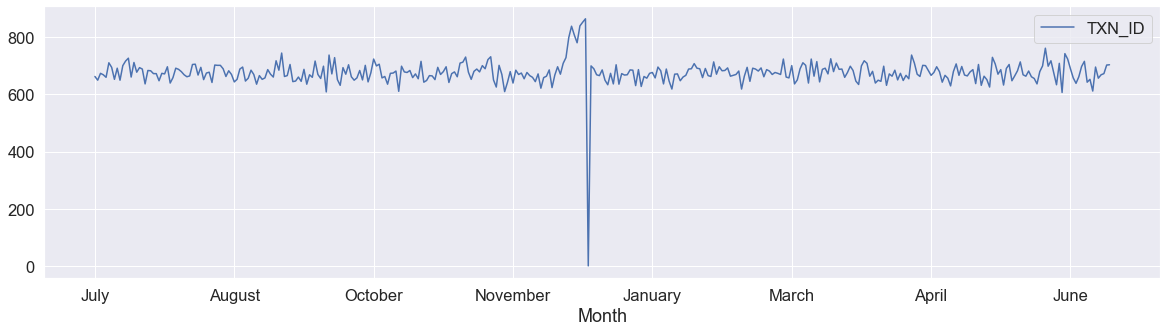

In [20]:
tran_df.plot(x='Month', y='TXN_ID', kind='line', figsize=(20,5))

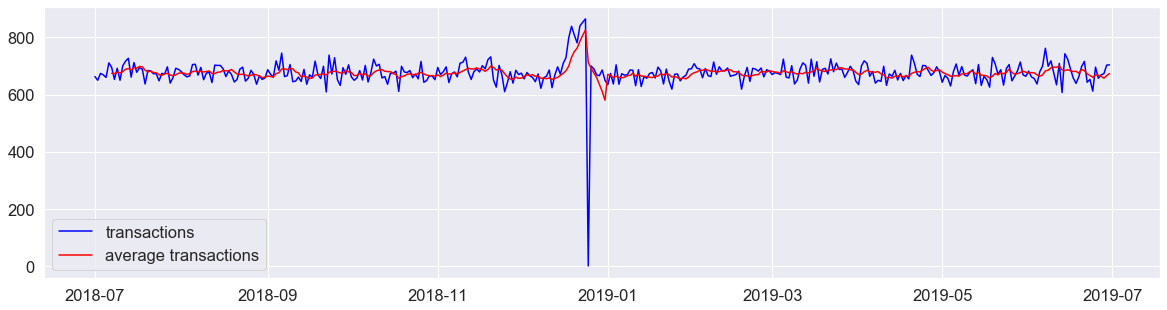

In [21]:
moving_average = tran_df['TXN_ID'].rolling(7).mean()
plt.subplots(nrows=1, ncols=1, figsize=(20,5))
plt.plot(tran_df['TXN_ID'], color='blue', label='transactions')
plt.plot(moving_average, color='red', label='average transactions')
plt.legend(loc='best')
plt.show()

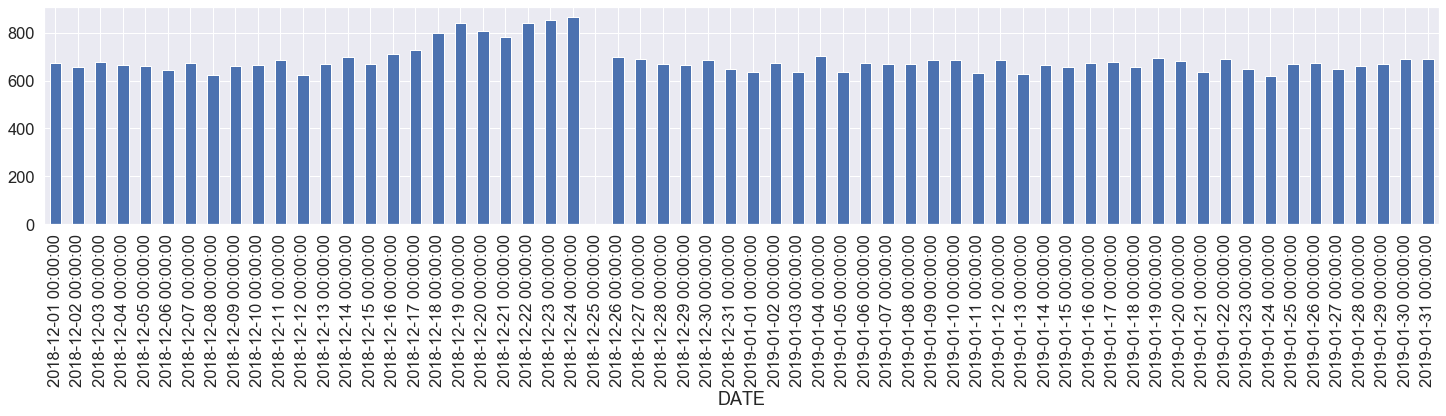

In [22]:
pd.date_range('2018-12-01', '2018-12-31', freq='D')
tran_df['2018-12-01': '2019-01-31']['TXN_ID'].plot(kind='bar', figsize=(25,4))

# CHIP BRAND NAME AND SIZE EXTRACTION

In [23]:
import re
chip_df.reset_index(inplace=True)
chip_df.drop('index', axis=1, inplace=True)

brands =[]
weight = []
for text in chip_df['PROD_NAME']:
    size = re.findall(r'\d{1,}', text)
    weight.append(size[0])
    tokens = text.split()
    if tokens[0] == 'RRD': brands.append('Red')
    elif tokens[0] == 'WW': brands.append('Woolworths')
    elif tokens[0] == 'Infzns': brands.append('Infuzions')
    elif tokens[0] == 'GrnWves': brands.append('Grain')
    elif tokens[0] == 'Snbts': brands.append('Sunbites')
    elif tokens[0] == 'Smith': brands.append('Smiths')
    elif tokens[0] == 'NCC': brands.append('Natural')
    elif tokens[0] == 'Dorito': brands.append('Doritos')
    else: brands.append(tokens[0])

C:\Users\Huleji\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
chip_df['brands'] = pd.Series(brands)
chip_df['sizes'] = pd.Series(weight)
chip_df.head(10)

C:\Users\Huleji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Huleji\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CHIP_CAT,brands,sizes
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,Kettle,150
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,1,Smiths,330
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,1,Grain,210
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,1,Doritos,150
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,1,Grain,210
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,1,Smiths,330


# CHIP SIZE DISTRIBUTION

C:\Users\Huleji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


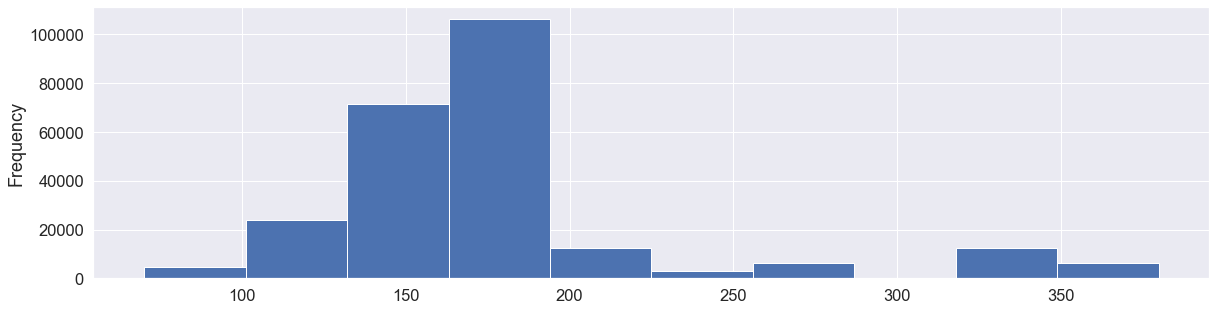

In [25]:
chip_df['sizes'] = chip_df['sizes'].astype(float)
chip_df['sizes'].plot(kind='hist', figsize=(20,5))

# CUSTOMER PURCHASE DATA DESCRIPTION AND SUMMARY

In [26]:
purc_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
purc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
purc_data.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


# PURCHASE DATA DISTRIBUTION

In [29]:
purc_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [30]:
lifestage_data = pd.DataFrame(purc_data['LIFESTAGE'].value_counts())
lifestage_data.reset_index(inplace=True)
lifestage_data.columns=['lifestage_group', 'number']
lifestage_data['group %'] = (lifestage_data['number']/lifestage_data['number'].sum())*100
lifestage_data = lifestage_data.sort_values('group %', ascending=False)
lifestage_data

,lifestage_group,number,group %
0,RETIREES,14805,20.382174
1,OLDER SINGLES/COUPLES,14609,20.112339
2,YOUNG SINGLES/COUPLES,14441,19.881052
3,OLDER FAMILIES,9780,13.464212
4,YOUNG FAMILIES,9178,12.635434
5,MIDAGE SINGLES/COUPLES,7275,10.015557
6,NEW FAMILIES,2549,3.509231


In [31]:
customer_data = pd.DataFrame(purc_data['PREMIUM_CUSTOMER'].value_counts())
customer_data.reset_index(inplace=True)
customer_data.columns=['customer_group', 'number']
customer_data['group %'] = (customer_data['number']/customer_data['number'].sum())*100
customer_data = customer_data.sort_values('group %', ascending=False)
customer_data

,customer_group,number,group %
0,Mainstream,29245,40.261850
1,Budget,24470,33.688065
2,Premium,18922,26.050085


In [32]:
store_data = pd.merge(chip_df, purc_data, how='inner', on=['LYLTY_CARD_NBR'])
tot_store_data = pd.merge(tran_data, purc_data, how='inner', on=['LYLTY_CARD_NBR'])

# CUSTOMER CHIP SALES BREAKDOWN

In [33]:
customer_breakdown = pd.DataFrame(store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum())
customer_breakdown.reset_index(inplace=True)
customer_segment = pd.DataFrame(store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].count())
customer_segment.columns = ['NUMBERS_OF_TXN']
customer_segment.reset_index(inplace=True)
customer_breakdown['NUMBERS_OF_TXN'] = customer_segment['NUMBERS_OF_TXN']
customer_breakdown = customer_breakdown[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'NUMBERS_OF_TXN', 'TOT_SALES']]
store_data['price'] = store_data['TOT_SALES']/store_data['PROD_QTY']
customer_segment = pd.DataFrame(store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['price'].mean())
customer_segment.columns = ['PRICE']
customer_segment.reset_index(inplace=True)
customer_breakdown['AV_PRICE'] = customer_segment['PRICE']
customer_breakdown

,LIFESTAGE,PREMIUM_CUSTOMER,NUMBERS_OF_TXN,TOT_SALES,AV_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,4691,33345.70,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,11095,84734.25,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,7612,54443.85,3.770698
3,NEW FAMILIES,Budget,2824,20607.45,3.917688
4,NEW FAMILIES,Mainstream,2185,15979.70,3.916133
5,NEW FAMILIES,Premium,1488,10760.80,3.872110
6,OLDER FAMILIES,Budget,21514,156863.75,3.745340
7,OLDER FAMILIES,Mainstream,13241,96413.55,3.737077
8,OLDER FAMILIES,Premium,10403,75242.60,3.717000
9,OLDER SINGLES/COUPLES,Budget,17172,127833.60,3.882096


# TOTAL CUSTOMER SALES BREAKDOWN

In [34]:
tot_customer_breakdown = pd.DataFrame(tot_store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum())
tot_customer_breakdown.reset_index(inplace=True)
tot_customer_segment = pd.DataFrame(tot_store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].count())
tot_customer_segment.columns = ['NUMBERS_OF_TXN']
tot_customer_segment.reset_index(inplace=True)
tot_customer_breakdown['NUMBERS_OF_TXN'] = tot_customer_segment['NUMBERS_OF_TXN']
tot_customer_breakdown = tot_customer_breakdown[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'NUMBERS_OF_TXN', 'TOT_SALES']]
tot_store_data['price'] = tot_store_data['TOT_SALES']/tot_store_data['PROD_QTY']
tot_customer_segment = pd.DataFrame(tot_store_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['price'].mean())
tot_customer_segment.columns = ['PRICE']
tot_customer_segment.reset_index(inplace=True)
tot_customer_breakdown['AV_PRICE'] = tot_customer_segment['PRICE']
tot_customer_breakdown['CHIP_TOT_SALES'] = customer_breakdown['TOT_SALES']
tot_customer_breakdown

,LIFESTAGE,PREMIUM_CUSTOMER,NUMBERS_OF_TXN,TOT_SALES,AV_PRICE,CHIP_TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,5020,35514.80,3.728496,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,11874,90803.85,4.000101,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,8216,58432.65,3.752915,54443.85
3,NEW FAMILIES,Budget,3005,21928.45,3.919251,20607.45
4,NEW FAMILIES,Mainstream,2325,17013.90,3.916581,15979.70
5,NEW FAMILIES,Premium,1589,11491.10,3.871743,10760.80
6,OLDER FAMILIES,Budget,23160,168363.25,3.733344,156863.75
7,OLDER FAMILIES,Mainstream,14244,103445.55,3.727383,96413.55
8,OLDER FAMILIES,Premium,11192,81958.40,3.704543,75242.60
9,OLDER SINGLES/COUPLES,Budget,18407,136769.80,3.877022,127833.60


# CHIP SALES DISTRIBUTION PER CUSTOMER

In [35]:
customer_df = pd.DataFrame(store_data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum())
customer_df.reset_index(inplace=True)
customer_df.rename(columns={'TOT_SALES':'CHIP_TOT_SALES'}, inplace=True)
customer_df['chip_sales %'] = (customer_df['CHIP_TOT_SALES']/customer_df['CHIP_TOT_SALES'].sum())*100
customer_df = customer_df.sort_values('chip_sales %', ascending=False)
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,CHIP_TOT_SALES,chip_sales %
59820,230078,OLDER FAMILIES,Budget,138.6,0.007678
15646,58361,YOUNG FAMILIES,Budget,124.8,0.006913
16928,63197,OLDER FAMILIES,Budget,122.6,0.006792
42037,162039,OLDER FAMILIES,Mainstream,121.6,0.006736
47076,179228,YOUNG FAMILIES,Budget,120.8,0.006692


# TOTAL SALES DISTRIBUTION PER CUSTOMER

In [36]:
spend_data = pd.DataFrame(tran_data.groupby(['LYLTY_CARD_NBR'])['TOT_SALES'].sum())
spend_data.reset_index(inplace=True)
spend_data['sales %'] = (spend_data['TOT_SALES']/spend_data['TOT_SALES'].sum())*100
spend_data = spend_data.sort_values('sales %', ascending=False)
spend_data.head()

,LYLTY_CARD_NBR,TOT_SALES,sales %
59694,226000,1300.0,0.067204
60925,230078,138.6,0.007165
17292,63197,132.8,0.006865
69017,259009,127.2,0.006576
42813,162039,126.8,0.006555


# TOTAL SPENDING IN RELATION TO CHIP PURCHASES PER CUSTOMER

In [37]:
habit_data = pd.merge(spend_data.drop('sales %',axis=1), customer_df.drop('chip_sales %',axis=1), how='inner', on=['LYLTY_CARD_NBR'])
habit_data['%difference'] = (habit_data['CHIP_TOT_SALES']/habit_data['TOT_SALES'])*100
habit_data = habit_data.sort_values('%difference', ascending=False)
habit_data.tail(20)

,LYLTY_CARD_NBR,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,CHIP_TOT_SALES,%difference
39236,166079,19.0,RETIREES,Mainstream,3.7,19.473684
48042,74112,12.6,YOUNG SINGLES/COUPLES,Mainstream,2.4,19.047619
39666,105037,18.8,NEW FAMILIES,Budget,3.4,18.085106
33118,231211,24.8,NEW FAMILIES,Mainstream,4.4,17.741935
33127,141184,24.8,OLDER SINGLES/COUPLES,Budget,4.4,17.741935
33123,7107,24.8,OLDER SINGLES/COUPLES,Budget,4.4,17.741935
20629,3132,37.2,OLDER SINGLES/COUPLES,Premium,6.6,17.741935
48283,90451,12.3,OLDER SINGLES/COUPLES,Budget,2.1,17.073171
40217,103350,18.4,OLDER SINGLES/COUPLES,Premium,3.0,16.304348
48435,38500,12.1,YOUNG FAMILIES,Budget,1.9,15.702479


# CHIP BUYERS PER CATEGORY DISTRIBUTION

In [38]:
customer_segment = pd.DataFrame(store_data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE',
                                                    'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count())
# customer_segment.reset_index(inplace=True)
customer_segment = pd.DataFrame(customer_segment.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count())
customer_segment.columns = ['CHIP_BUYERS']
customers = pd.DataFrame(purc_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count())
customers.columns = ['STORE_CUSTOMERS']
customers['CHIP_BUYERS'] = customer_segment['CHIP_BUYERS']
customers['buyer %'] = (customers['CHIP_BUYERS']/customers['STORE_CUSTOMERS'])*100
# customers = customers.sort_values('buyer %', ascending=False)
customers.reset_index(inplace=True)
customers.sort_values('CHIP_BUYERS', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,STORE_CUSTOMERS,CHIP_BUYERS,buyer %
19,YOUNG SINGLES/COUPLES,Mainstream,8088,7917,97.885757
13,RETIREES,Mainstream,6479,6358,98.132428
10,OLDER SINGLES/COUPLES,Mainstream,4930,4858,98.539554
9,OLDER SINGLES/COUPLES,Budget,4929,4849,98.376953
11,OLDER SINGLES/COUPLES,Premium,4750,4682,98.568421
6,OLDER FAMILIES,Budget,4675,4611,98.631016
12,RETIREES,Budget,4454,4385,98.450831
15,YOUNG FAMILIES,Budget,4017,3953,98.406771
14,RETIREES,Premium,3872,3812,98.450413
18,YOUNG SINGLES/COUPLES,Budget,3779,3647,96.507012


# CHIP SALES IN RELATION TO TOTAL SALES PER LIFESTAGE DISTRIBUTION

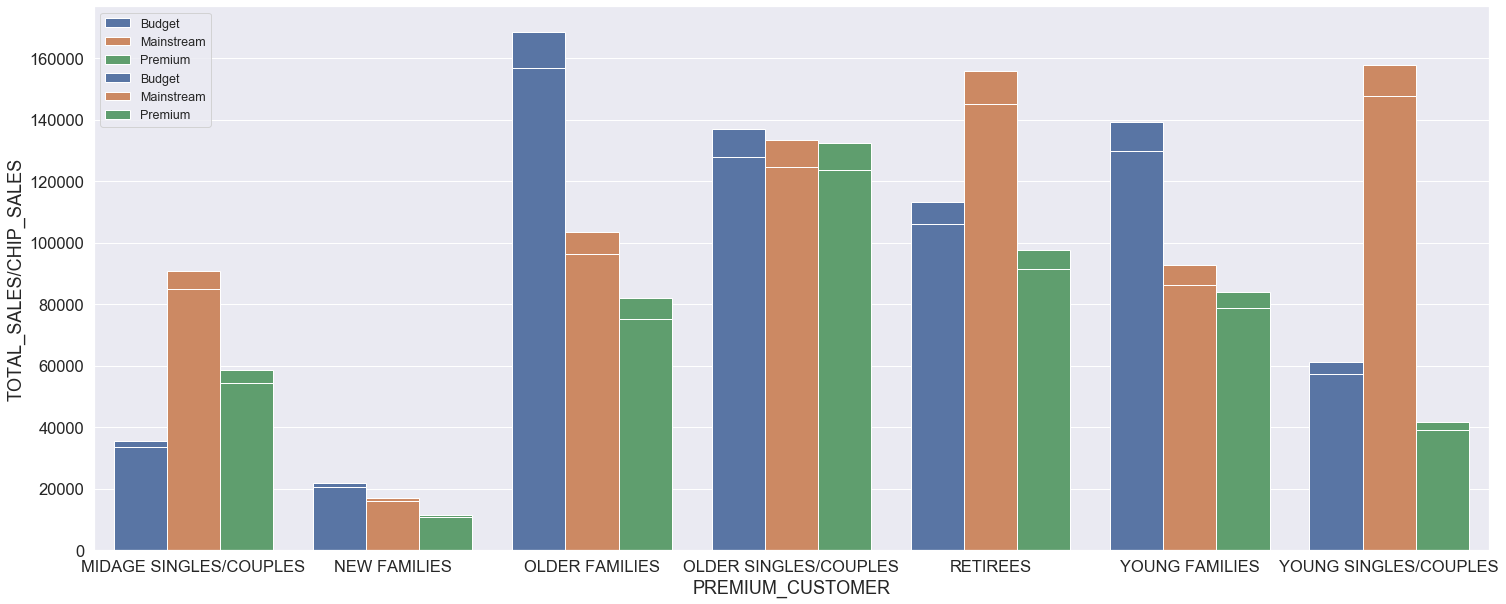

In [39]:
fig, ax = plt.subplots(figsize=(25,10))

sns.catplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", kind="bar", data=tot_customer_breakdown, aspect=10, ax=ax);
sns.catplot(x='LIFESTAGE', y='CHIP_TOT_SALES', hue="PREMIUM_CUSTOMER", kind="bar", data=tot_customer_breakdown, ax=ax);

ax.legend(loc="upper left", fontsize='x-small')
ax.set(ylabel="TOTAL_SALES/CHIP_SALES", xlabel="PREMIUM_CUSTOMER")
sns.despine(left=True, bottom=True)
plt.close(2)
plt.close(3)

# CHIP CUSTOMERS IN RELATION TO STORE CUSTOMERS DISTRIBUTION

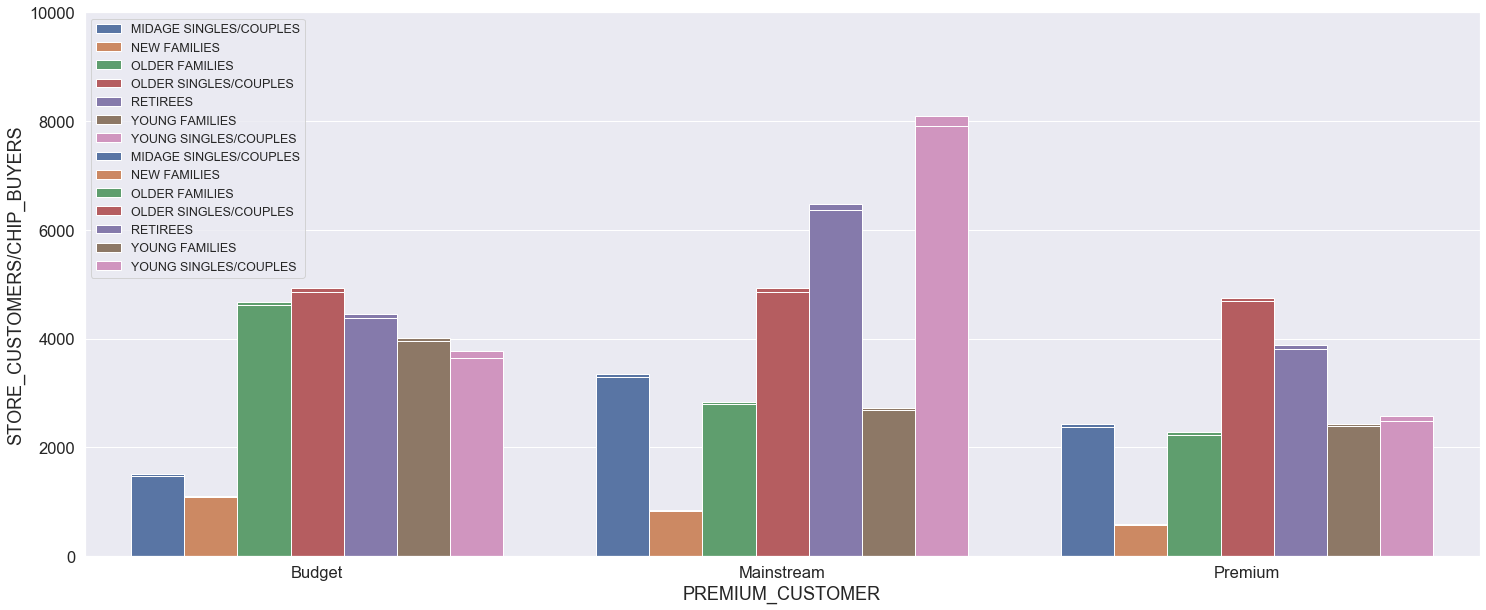

In [40]:
ax = plt.subplots(figsize=(25,10))[1]
sns.catplot(x='PREMIUM_CUSTOMER', y='STORE_CUSTOMERS', hue="LIFESTAGE", kind="bar", data=customers, ax=ax, legend=False,
            legend_out=False)
sns.catplot(x='PREMIUM_CUSTOMER', y='CHIP_BUYERS', hue="LIFESTAGE", kind="bar", data=customers, ax=ax)

ax.legend(loc="upper left", fontsize='x-small')
ax.set(ylim=(0,10000), ylabel="STORE_CUSTOMERS/CHIP_BUYERS", xlabel="PREMIUM_CUSTOMER")
sns.despine(left=True, bottom=True)
plt.close(2)
plt.close(3)

# TOTAL/CHIP SALES AND BUYER DISTRIBUTION PER CUSTOMER CATEGORY

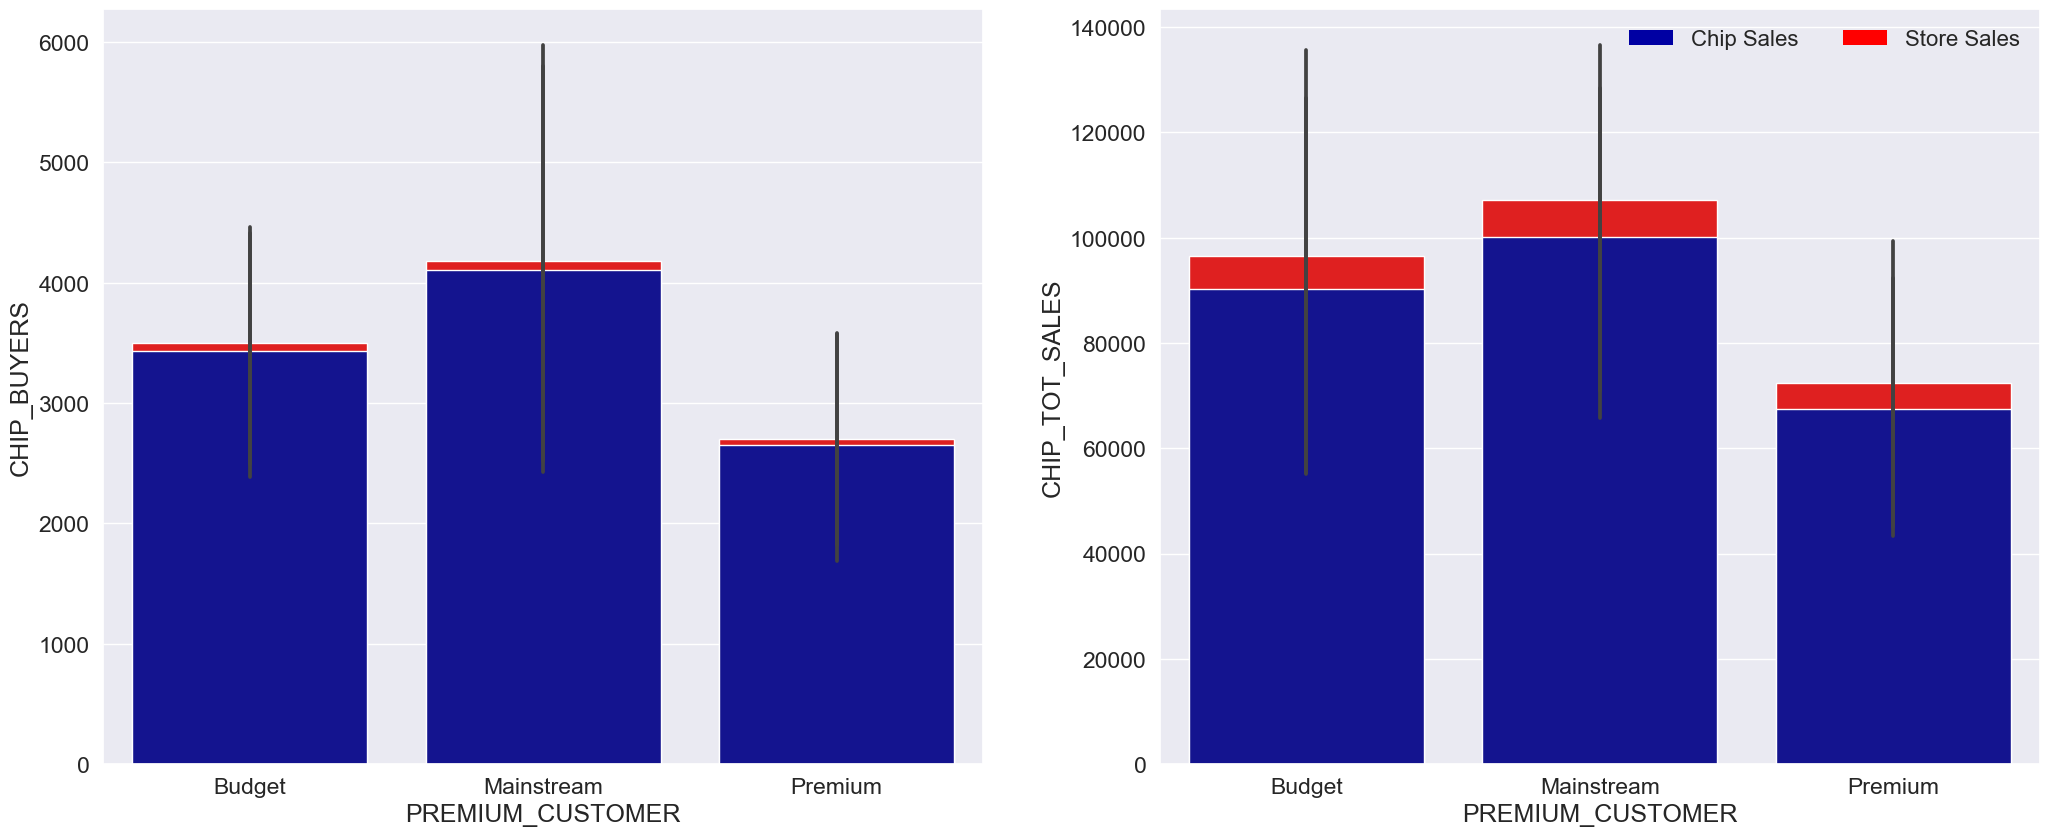

In [41]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(25,10), dpi=100)

#Plot 1 - background - "total" (top) series
sns.barplot(x=customers['PREMIUM_CUSTOMER'], y=customers['STORE_CUSTOMERS'], color = "red", ax=ax1)

#Plot 2 - overlay - "bottom" series
sns.barplot(x=customers['PREMIUM_CUSTOMER'], y=customers['CHIP_BUYERS'], color="#0000A3", ax=ax1)


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Chip Customers','Store Customers'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Plot 1 - background - "total" (top) series
sns.barplot(x=tot_customer_breakdown['PREMIUM_CUSTOMER'], y=tot_customer_breakdown['TOT_SALES'], color = "red", ax=ax2)

#Plot 2 - overlay - "bottom" series
sns.barplot(x=tot_customer_breakdown['PREMIUM_CUSTOMER'], y=tot_customer_breakdown['CHIP_TOT_SALES'], color="#0000A3", ax=ax2)

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Chip Sales','Store Sales'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

# TOTAL/CHIP SALES AND BUYER DISTRIBUTION PER CUSTOMER LIFESTAGE

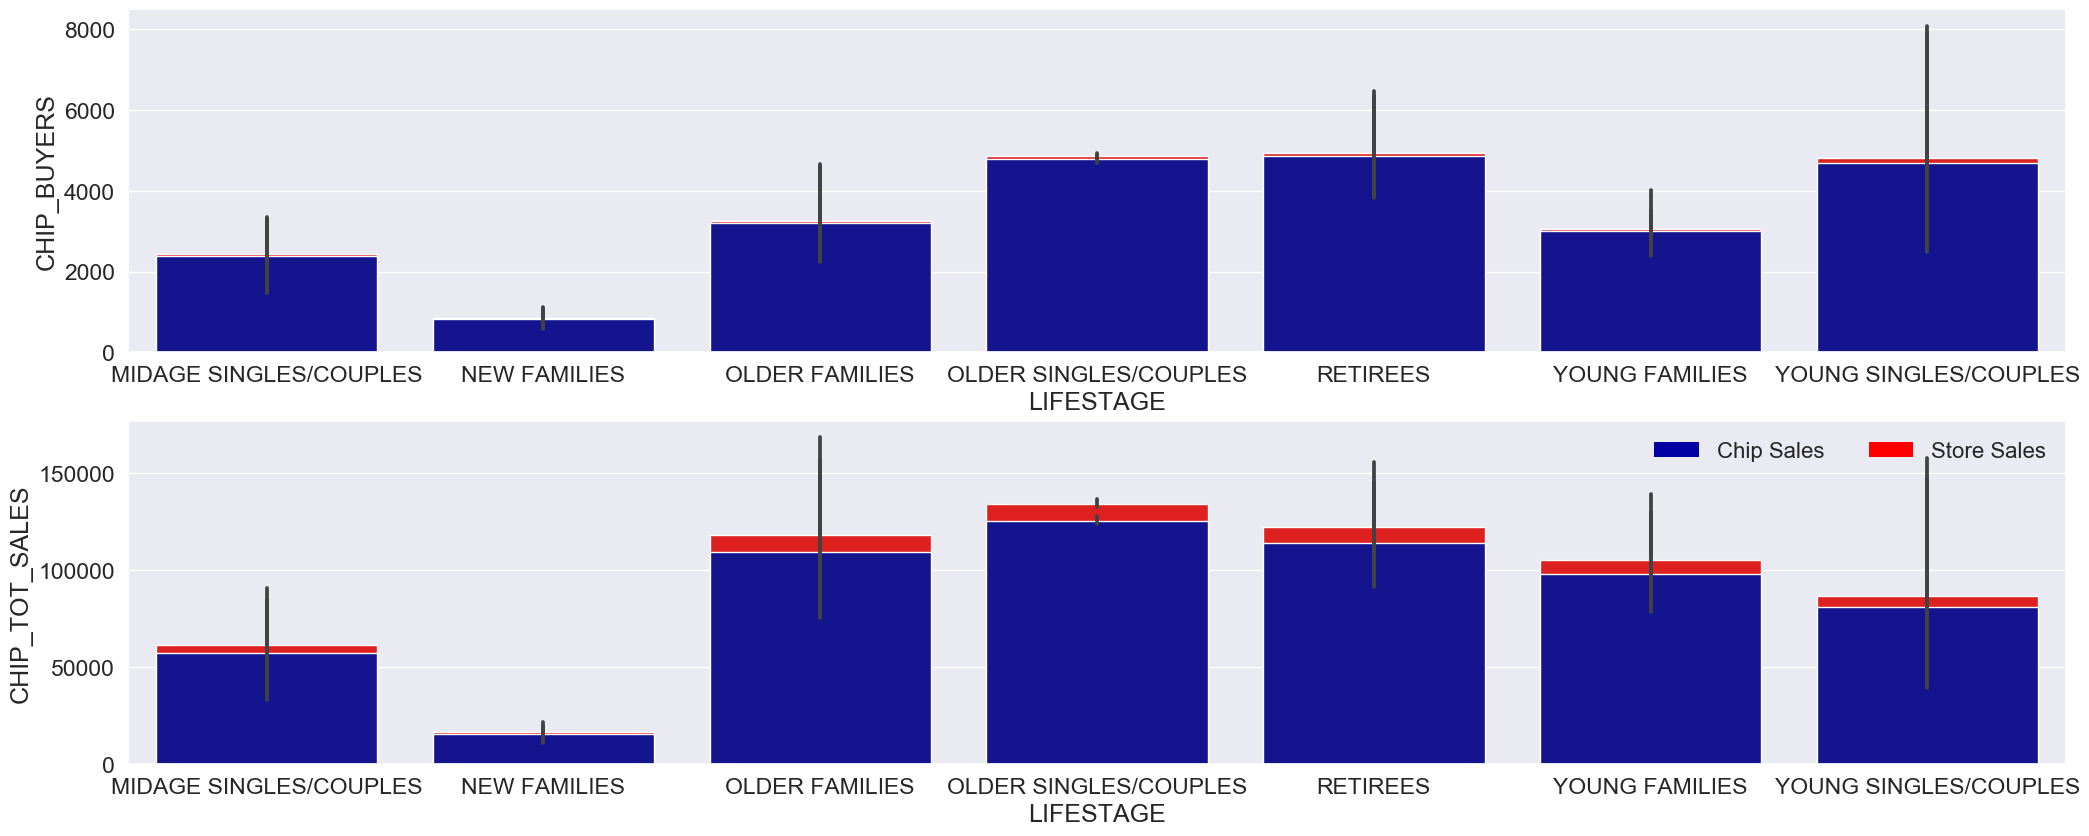

In [42]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(25,10), dpi=100)

#Plot 1 - background - "total" (top) series
sns.barplot(x=customers['LIFESTAGE'], y=customers['STORE_CUSTOMERS'], color = "red", ax=ax1)

#Plot 2 - overlay - "bottom" series
sns.barplot(x=customers['LIFESTAGE'], y=customers['CHIP_BUYERS'], color="#0000A3",  ax=ax1)

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Chip Customers','Store Customers'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Plot 1 - background - "total" (top) series
sns.barplot(x=customers['LIFESTAGE'], y=tot_customer_breakdown['TOT_SALES'], color = "red", ax=ax2)

#Plot 2 - overlay - "bottom" series
sns.barplot(x=customers['LIFESTAGE'], y=tot_customer_breakdown['CHIP_TOT_SALES'], color="#0000A3", ax=ax2)

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Chip Sales','Store Sales'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

# AVERAGE UNIT CHIP PRICE PER CUSTOMER

In [43]:
price_breakdown = pd.DataFrame(store_data.groupby(['LYLTY_CARD_NBR','LIFESTAGE',
                                                   'PREMIUM_CUSTOMER'])[['TOT_SALES','PROD_QTY']].sum()).reset_index()
price_breakdown['AV_UNIT_PRICE'] = price_breakdown['TOT_SALES']/price_breakdown['PROD_QTY']
price_breakdown.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AV_UNIT_PRICE
0,1000,YOUNG SINGLES/COUPLES,Premium,6.0,2,3.000
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2.7,1,2.700
2,1003,YOUNG FAMILIES,Budget,6.6,2,3.300
3,1004,OLDER SINGLES/COUPLES,Mainstream,1.9,1,1.900
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,2.8,1,2.800
5,1007,YOUNG SINGLES/COUPLES,Budget,6.5,2,3.250
6,1009,NEW FAMILIES,Premium,5.7,1,5.700
7,1010,YOUNG SINGLES/COUPLES,Mainstream,8.8,2,4.400
8,1011,OLDER SINGLES/COUPLES,Mainstream,12.9,4,3.225
9,1012,OLDER FAMILIES,Mainstream,10.3,2,5.150


# AVERAGE UNIT PRICE STATISTICS

In [44]:
price_breakdown['AV_UNIT_PRICE'].mean()

3.8767154608458037

In [45]:
price_breakdown.groupby('PREMIUM_CUSTOMER')['AV_UNIT_PRICE'].mean()

PREMIUM_CUSTOMER
Budget        3.832061
Mainstream    3.935768
Premium       3.843026
Name: AV_UNIT_PRICE, dtype: float64

In [46]:
price_breakdown.groupby('LIFESTAGE')['AV_UNIT_PRICE'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    3.901836
NEW FAMILIES              3.886499
OLDER FAMILIES            3.808282
OLDER SINGLES/COUPLES     3.883769
RETIREES                  3.907332
YOUNG FAMILIES            3.822653
YOUNG SINGLES/COUPLES     3.904959
Name: AV_UNIT_PRICE, dtype: float64

In [47]:
mainstream_my = price_breakdown[price_breakdown['PREMIUM_CUSTOMER']=='Mainstream']
mainstream_my.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    3298
NEW FAMILIES               830
OLDER FAMILIES            2788
OLDER SINGLES/COUPLES     4858
RETIREES                  6358
YOUNG FAMILIES            2685
YOUNG SINGLES/COUPLES     7917
Name: LYLTY_CARD_NBR, dtype: int64

In [48]:
mainstream_my.groupby('LIFESTAGE')['AV_UNIT_PRICE'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    4.063488
NEW FAMILIES              3.898040
OLDER FAMILIES            3.813291
OLDER SINGLES/COUPLES     3.814284
RETIREES                  3.839393
YOUNG FAMILIES            3.796621
YOUNG SINGLES/COUPLES     4.128781
Name: AV_UNIT_PRICE, dtype: float64

In [49]:
mainstream_df = pd.concat([mainstream_my[mainstream_my['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'],
                         mainstream_my[mainstream_my['LIFESTAGE']=='YOUNG SINGLES/COUPLES']], axis=0)
mainstream_df['AV_UNIT_PRICE'].mean(), mainstream_df['AV_UNIT_PRICE'].std()

(4.109580160203128, 0.7396056177248128)

In [50]:
premium_my = price_breakdown[price_breakdown['PREMIUM_CUSTOMER']=='Premium']
premium_my.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    2369
NEW FAMILIES               575
OLDER FAMILIES            2231
OLDER SINGLES/COUPLES     4682
RETIREES                  3812
YOUNG FAMILIES            2398
YOUNG SINGLES/COUPLES     2480
Name: LYLTY_CARD_NBR, dtype: int64

In [51]:
premium_my.groupby('LIFESTAGE')['AV_UNIT_PRICE'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    3.772121
NEW FAMILIES              3.859990
OLDER FAMILIES            3.785839
OLDER SINGLES/COUPLES     3.935973
RETIREES                  3.959497
YOUNG FAMILIES            3.833642
YOUNG SINGLES/COUPLES     3.612841
Name: AV_UNIT_PRICE, dtype: float64

In [52]:
budget_my = price_breakdown[price_breakdown['PREMIUM_CUSTOMER']=='Budget']
budget_my.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    1474
NEW FAMILIES              1087
OLDER FAMILIES            4611
OLDER SINGLES/COUPLES     4849
RETIREES                  4385
YOUNG FAMILIES            3953
YOUNG SINGLES/COUPLES     3647
Name: LYLTY_CARD_NBR, dtype: int64

In [53]:
budget_my.groupby('LIFESTAGE')['AV_UNIT_PRICE'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    3.748624
NEW FAMILIES              3.891710
OLDER FAMILIES            3.816112
OLDER SINGLES/COUPLES     3.902976
RETIREES                  3.960490
YOUNG FAMILIES            3.833669
YOUNG SINGLES/COUPLES     3.617723
Name: AV_UNIT_PRICE, dtype: float64

In [54]:
premium_budget = pd.concat([premium_my[premium_my['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'],
                         premium_my[premium_my['LIFESTAGE']=='YOUNG SINGLES/COUPLES'],
                           budget_my[budget_my['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'],
                           budget_my[budget_my['LIFESTAGE']=='YOUNG SINGLES/COUPLES']], axis=0)
premium_budget['AV_UNIT_PRICE'].mean(), premium_budget['AV_UNIT_PRICE'].std()

(3.6725482534044356, 0.9146689700179766)

# HYPOTHESIS TEST

The t-test (38.4094) results in a p-value < .00001., i.e. the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

# CHIP BRAND DISTRIBUTION

In [55]:
store_data['brands'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
Red           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: brands, dtype: int64

# CHIP BRAND/SIZE DISTUBUTION PER CUSTOMER CATEGORY

In [56]:
mainstream = store_data[store_data['PREMIUM_CUSTOMER']=='Mainstream']
# mainstream['brands'].value_counts()
mainstream[mainstream['brands']== 'Kettle']['sizes'].value_counts()

150.0    7660
175.0    7447
135.0    1316
Name: sizes, dtype: int64

In [57]:
budget = store_data[store_data['PREMIUM_CUSTOMER']=='Budget']
# budget['brands'].value_counts()
budget[budget['brands']== 'Kettle']['sizes'].value_counts()

175.0    6594
150.0    6465
135.0    1095
Name: sizes, dtype: int64

In [58]:
premium = store_data[store_data['PREMIUM_CUSTOMER']=='Budget']
# premium['brands'].value_counts()
premium[premium['brands']== 'Kettle']['sizes'].value_counts()

175.0    6594
150.0    6465
135.0    1095
Name: sizes, dtype: int64

In [59]:
mainstream_ys = mainstream[mainstream['LIFESTAGE']== 'YOUNG SINGLES/COUPLES']
# mainstream_ys['brands'].value_counts()
mainstream_ys[mainstream_ys['brands']=='Kettle']['sizes'].value_counts()

150.0    1778
175.0    1776
135.0     290
Name: sizes, dtype: int64

In [60]:
# mainstream_ys['sizes'].value_counts()
mainstream_ys[mainstream_ys['sizes']==175.0]['brands'].value_counts()

Kettle        1776
Thins         1166
Tostitos       890
Natural        394
Smiths         355
CCs            222
Woolworths     116
French          78
Name: brands, dtype: int64

In [61]:
mainstream_rt = mainstream[mainstream['LIFESTAGE']== 'RETIREES']
# mainstream_rt['brands'].value_counts()
mainstream_rt[mainstream_rt['brands']=='Kettle']['sizes'].value_counts()

150.0    1613
175.0    1510
135.0     263
Name: sizes, dtype: int64

In [62]:
# mainstream_rt['sizes'].value_counts()
mainstream_rt[mainstream_rt['sizes']==175.0]['brands'].value_counts()

Kettle        1510
Thins         1199
Tostitos       739
Natural        587
Smiths         575
CCs            355
Woolworths     234
French          96
Name: brands, dtype: int64

In [63]:
mainstream_os = mainstream[mainstream['LIFESTAGE']== 'OLDER SINGLES/COUPLES']
# mainstream_os['brands'].value_counts()
mainstream_os[mainstream_os['brands']=='Kettle']['sizes'].value_counts()

150.0    1298
175.0    1258
135.0     279
Name: sizes, dtype: int64

In [64]:
mainstream_os['sizes'].value_counts()
# mainstream_os[mainstream_os['sizes']==175.0]['brands'].value_counts()

175.0    4525
150.0    2773
134.0    1720
110.0    1557
170.0    1433
165.0    1061
330.0     805
380.0     455
210.0     424
270.0     411
200.0     330
135.0     279
190.0     226
250.0     223
90.0      222
160.0     212
125.0     111
70.0      101
180.0     100
220.0      93
Name: sizes, dtype: int64

Going through the data concering the top 3 customer segments - Mainstream young singles/couples, retirees and older singles/couples. It is clear that the favourite chip package is Kettles 150 gram but the favorite chip packet size is the 175g pack size